In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None) # Set the option to display all columns

- Month: The month in which the insurance claim was made.
- WeekOfMonth: The week of the month in which the insurance claim was made.
- DayOfWeek: The day of the week on which the insurance claim was made.
- Make: The manufacturer of the vehicle involved in the claim.
- AccidentArea: The area where the accident occurred (e.g., urban, rural).
- DayOfWeekClaimed: The day of the week on which the insurance claim was processed.
- MonthClaimed: The month in which the insurance claim was processed.
- WeekOfMonthClaimed: The week of the month in which the insurance claim was processed.
- Sex: The gender of the policyholder.
- MaritalStatus: The material status of the policyholder.
- Age: The age of the policyholder.
- Fault: Indicates whether the policyholder was at fault in the accident.
- PolicyType: The type of insurance policy (e.g., comprehensive, third-party).
- VehicleCategory: The category of the vehicle (e.g., sedan, SUV).
- VehiclePrice: The price of vehicle.
- FraudFound_P: Indicates whether fraud was detected in the insurance claim.
- PolicyNumber: The unique identifier for the insurance policy.
- RepNumber: The unique identifier for the insurance representative handling the claim.
- Deductible: The amount that the policy holder must pay out of pocket before the insurance company pays the remaining costs.
- DriverRating: The rating of the driver, often based on driving history or other factors.
- Days_Policy_Accident: The number of days since the policy was issued until the accident occurred.
- Days_Policy_Claim: The number of days since the policy was issued until the claim was made.
- PastNumberOfClaims: The number of claims previously made by the policyholder.
- AgeOfVehicle: The age of the vehicle involved in the claim.
- AgeOfPolicyHolder: The age of the policyholder.
- PoliceReportFiled: Indicates whether a police report was filed for the accident.
- WitnessPresent: Indicates whether a witness was present at the scene of the accident.
- AgentType: The type of insurance agent handling the policy (e.g., internal, external)
- NumberOfSuppliments: The number of supplementary documents or claims related to the main claim, categorized into ranges.
- AddressChange_Claim: Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.
- NumberOfCars: The number of cars insured under the policy, categorized into ranges.
- Year: The year in which the claim was made or processed.
- BasePolicy: The base policy type (e.g., Liability, Collision, All Perils).

In [5]:
data_path = os.path.join(os.path.dirname("fraud_detection_EDA.ipynb"), '..', 'data', 'fraud_oracle.csv')
df = pd.read_csv(data_path)
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

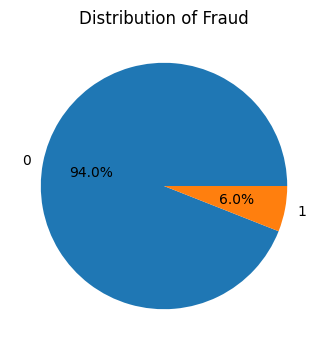

In [4]:
fraud_counts = df.FraudFound_P.value_counts()
plt.figure(figsize=(4, 4))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Fraud")
plt.show()

- The target (FraudFound_P) is highly unbalanced, we will definetly apply oversampling techniques to resolve this bias

## Analysing the Distribution of Fraud by Sex

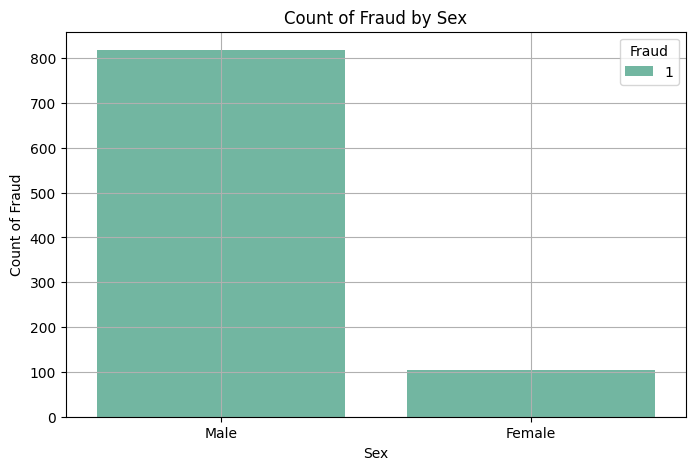

In [5]:
df_fraud = df[df['FraudFound_P'] == 1]

plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='FraudFound_P', data=df_fraud, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Count of Fraud')
plt.title('Count of Fraud by Sex')
plt.legend(title='Fraud', loc='upper right')
plt.grid()
plt.show()

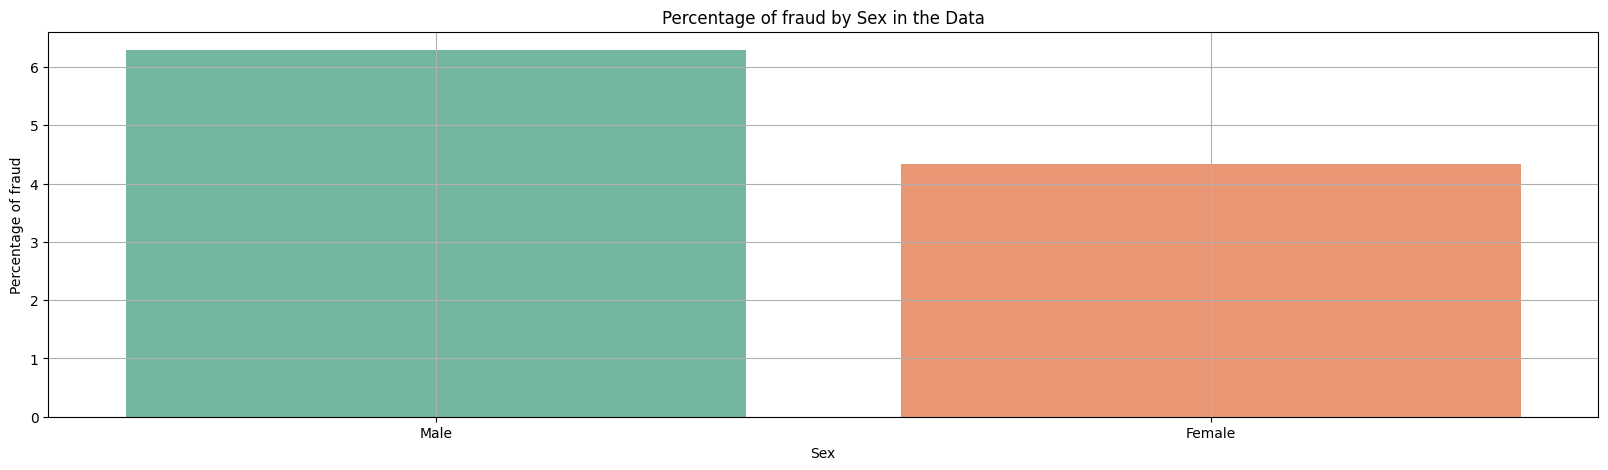

In [6]:
fraud_count = df[df['FraudFound_P'] == 1]['Sex'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['Sex'].value_counts()

gender = ['Male', 'Female']

# Step 2: Reindex the counts to ensure all genders are covered
fraud_count = fraud_count.reindex(gender)
non_fraud_count = non_fraud_count.reindex(gender)

# Step 3: Calculate the percentage of fraud for each gender
percentage_of_fraud_by_sex = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='Sex', y='count', hue= 'Sex', data=percentage_of_fraud_by_sex, palette='Set2', legend=False)
plt.xlabel('Sex')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by Sex in the Data')
plt.grid()
plt.show()

In [7]:
df.Sex.value_counts()

Sex
Male      13000
Female     2420
Name: count, dtype: int64

- The case frauds detected of Men are much high compared to females, but when comparing the percentage of fraud detected over all the cases we find that the both genders show a remarkable proximity in their values

## Analysing the Distribution of Fraud by Age

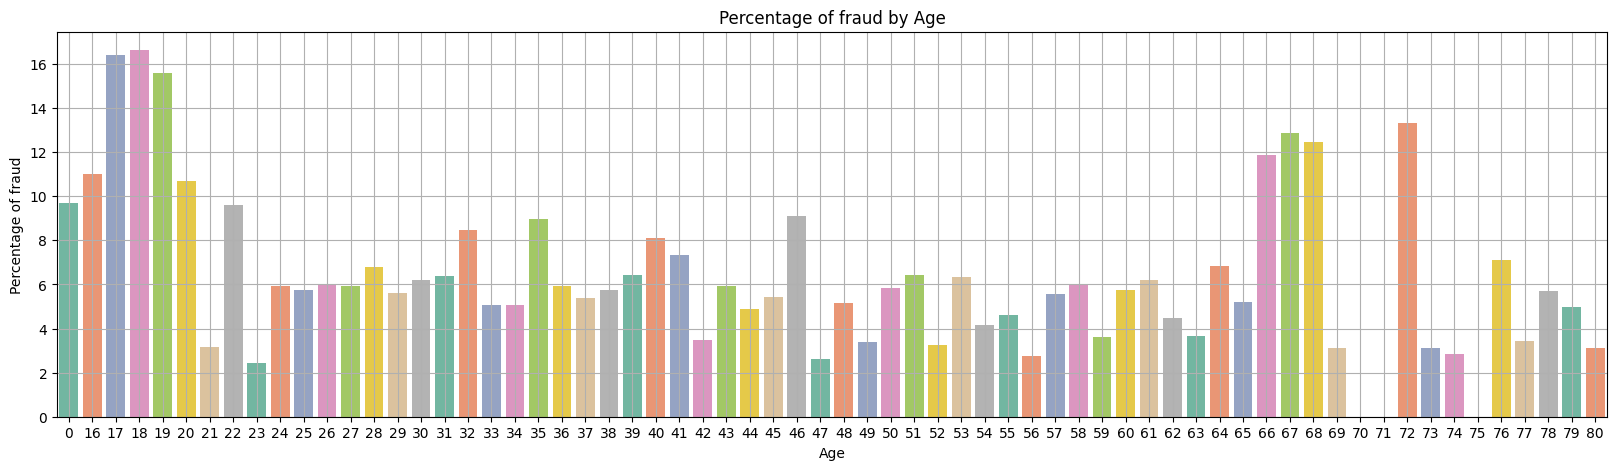

In [8]:
fraud_count = df[df['FraudFound_P'] == 1]['Age'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['Age'].value_counts()

Age = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the ages are covered
fraud_count = fraud_count.reindex(Age)
non_fraud_count = non_fraud_count.reindex(Age)

percentage_of_fraud_by_age = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='Age', y='count', hue= 'Age', data=percentage_of_fraud_by_age, palette='Set2', legend=False)
plt.xlabel('Age')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by Age')
plt.grid()
plt.show()

- Age = 0  is most probably null value
- Fraud is most frequently detected among teenagers and aged men. The commun point to commit a fraud can be financial.

## Distribution of Fraud by month

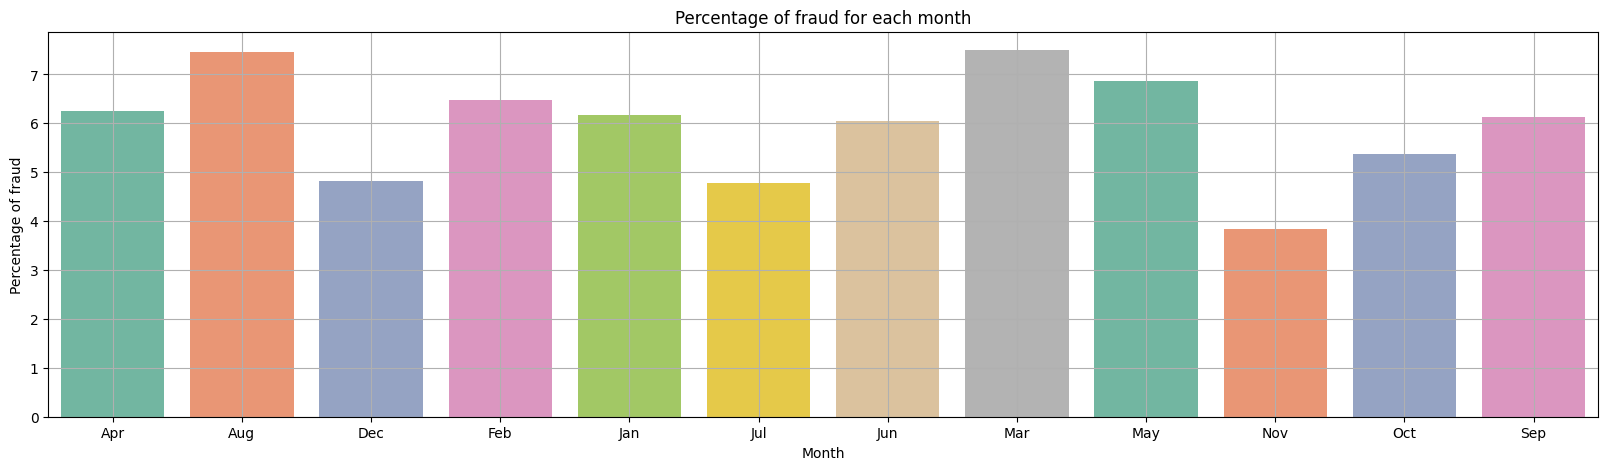

In [9]:
fraud_count = df[df['FraudFound_P'] == 1]['Month'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['Month'].value_counts()

# Get all possible month values and align the indexes
all_months = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all months are covered
fraud_count = fraud_count.reindex(all_months)
non_fraud_count = non_fraud_count.reindex(all_months)

percentage_of_fraud_each_month = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='Month', y='count', hue= 'Month', data=percentage_of_fraud_each_month, palette='Set2', legend=False)
plt.xlabel('Month')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud for each month')
plt.grid()
plt.show()

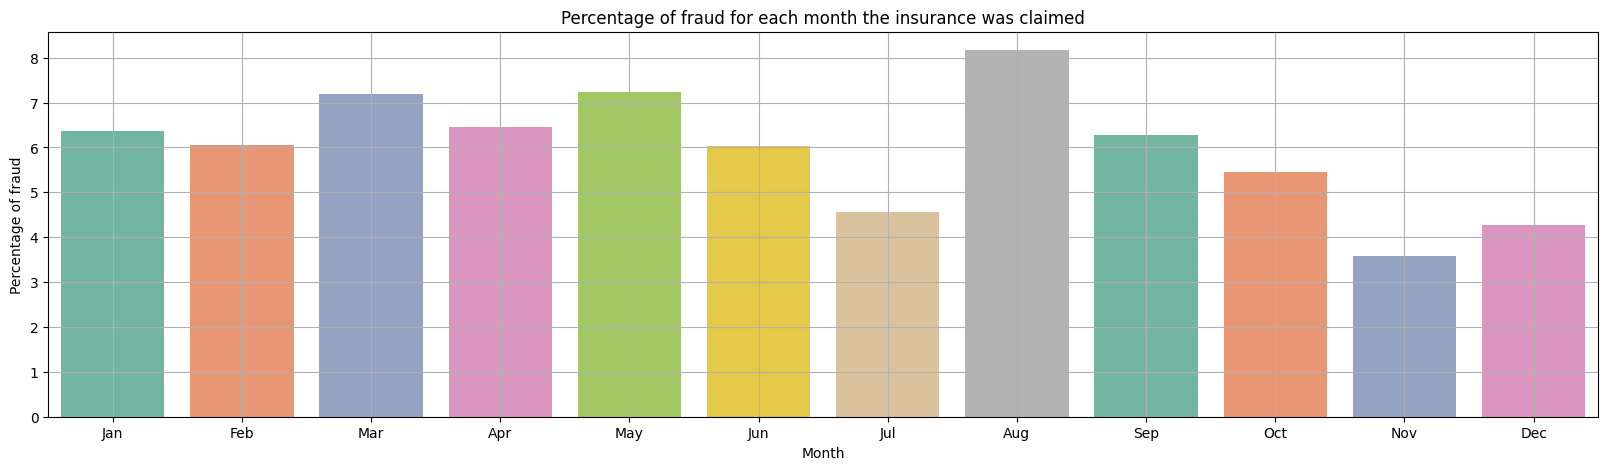

In [10]:
fraud_count = df[df['FraudFound_P'] == 1]['MonthClaimed'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['MonthClaimed'].value_counts()

# Get all possible month values and align the indexes
all_months_claimed = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reindex the counts to ensure all months are covered
fraud_count = fraud_count.reindex(all_months_claimed)
non_fraud_count = non_fraud_count.reindex(all_months_claimed)

percentage_of_fraud_each_month_claimed = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='MonthClaimed', y='count', hue= 'MonthClaimed', data=percentage_of_fraud_each_month_claimed, palette='Set2', legend=False)
plt.xlabel('Month')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud for each month the insurance was claimed')
plt.grid()
plt.show()

- The frauds detected over all months tend to be equal (the max difference is 2.5%)
- The 2 features has a similar distribution
- For instance the feature Month and MonthClaimed doesn't bring much information about the fraud detection

## Distribution of fraud by Driver Rating

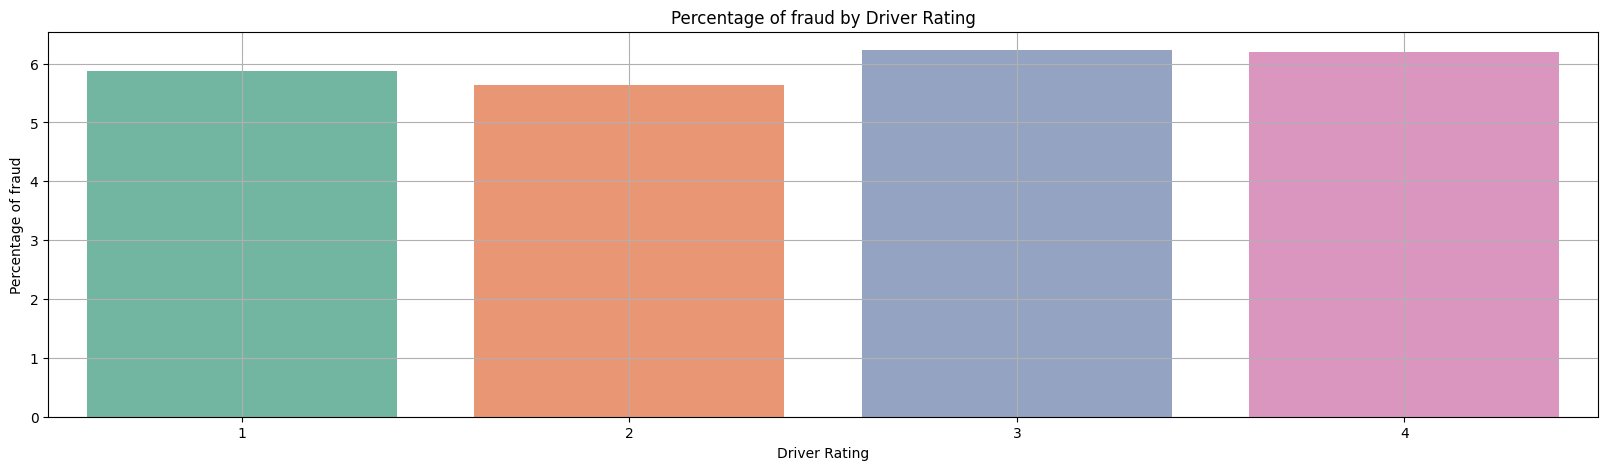

In [11]:
fraud_count = df[df['FraudFound_P'] == 1]['DriverRating'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['DriverRating'].value_counts()

# Get all possible driving levels and align the indexes
all_driving_levels = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the driving levels are covered
fraud_count = fraud_count.reindex(all_driving_levels)
non_fraud_count = non_fraud_count.reindex(all_driving_levels)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_driver_level = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='DriverRating', y='count', hue= 'DriverRating', data=percentage_of_fraud_by_driver_level, palette='Set2', legend=False)
plt.xlabel('Driver Rating')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by Driver Rating')
plt.grid()
plt.show()

- It seems like the Driver Rating has no influence on the Fraud detection
- Drivers can be skilled or starter and both can fraud reports

## Distribution of fraud by vehicle age

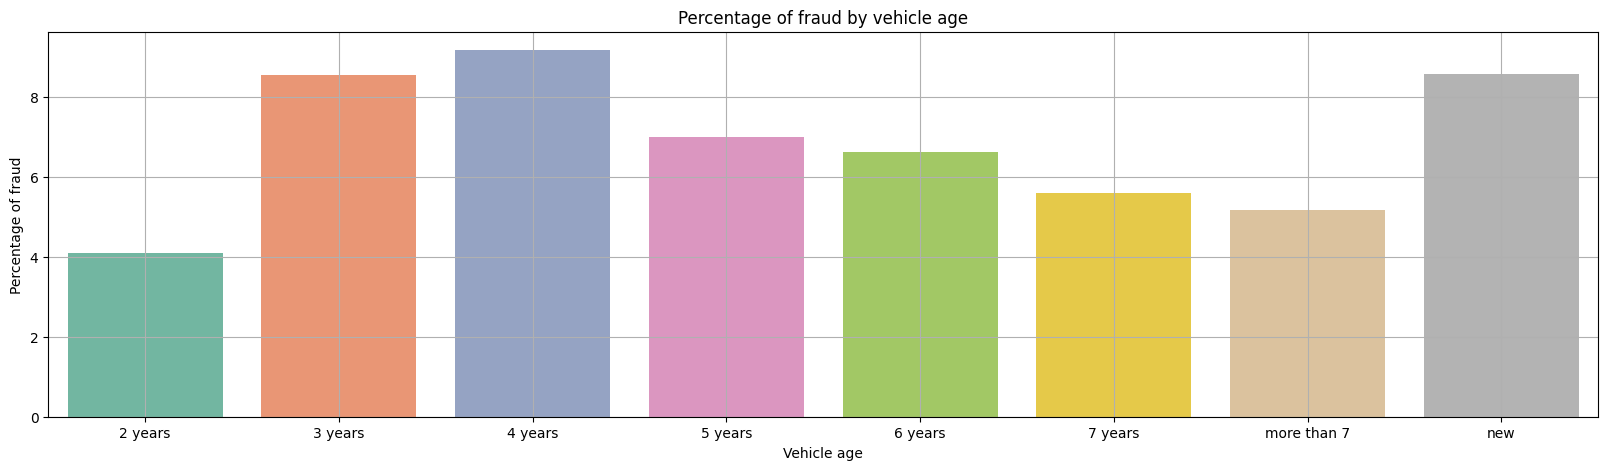

In [12]:
fraud_count = df[df['FraudFound_P'] == 1]['AgeOfVehicle'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['AgeOfVehicle'].value_counts()

# Get all possible driving levels and align the indexes
all_vehicle_ages = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the driving levels are covered
fraud_count = fraud_count.reindex(all_vehicle_ages)
non_fraud_count = non_fraud_count.reindex(all_vehicle_ages)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_vehicle_age = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='AgeOfVehicle', y='count', hue= 'AgeOfVehicle', data=percentage_of_fraud_by_vehicle_age, palette='Set2', legend=False)
plt.xlabel('Vehicle age')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by vehicle age')
plt.grid()
plt.show()

- New vehicle seems to have the most frequent fraud reports
- Maybe because the old vehicles has already commited a certain number of fraud reports, but the new vehicles can consider the little individual damages as accidents and report it

## Distribution of fraud by the number of vehicles involved

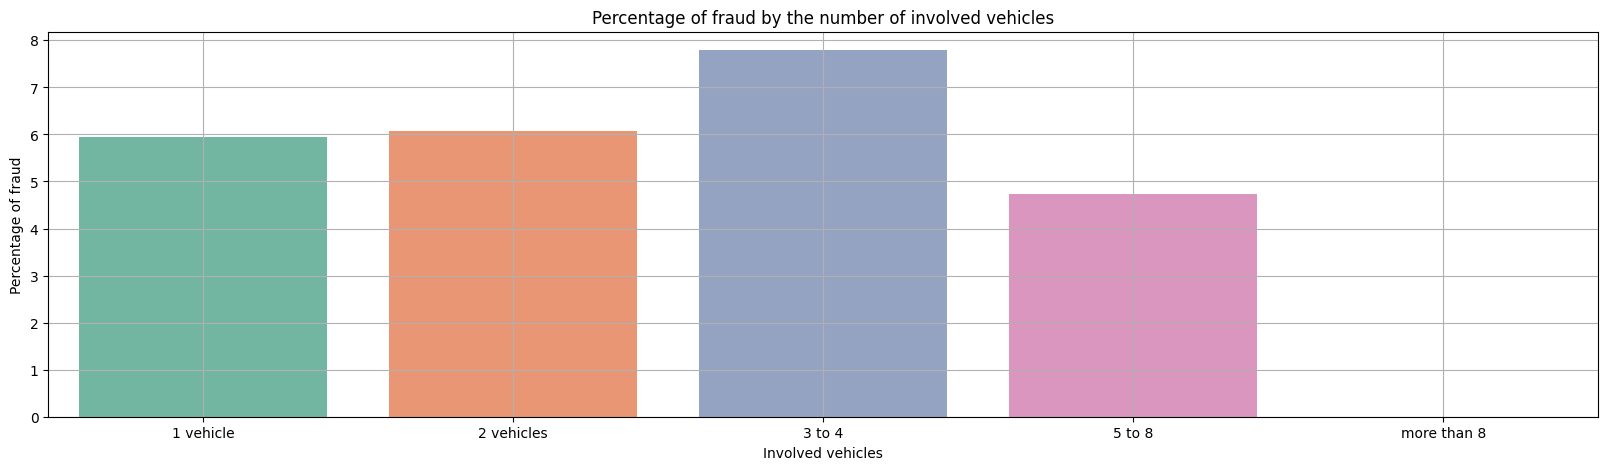

In [13]:
fraud_count = df[df['FraudFound_P'] == 1]['NumberOfCars'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['NumberOfCars'].value_counts()

# Get all possible involved cars and align the indexes
all_vehicles = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the involved cars cases are covered
fraud_count = fraud_count.reindex(all_vehicles)
non_fraud_count = non_fraud_count.reindex(all_vehicles)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_involved_cars = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='NumberOfCars', y='count', hue= 'NumberOfCars', data=percentage_of_fraud_by_involved_cars, palette='Set2', legend=False)
plt.xlabel('Involved vehicles')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by the number of involved vehicles')
plt.grid()
plt.show()

- The number of vehicles involved in the fake report has a negligible influence on the fraud detection

## Distribution of fraud by the Policy type

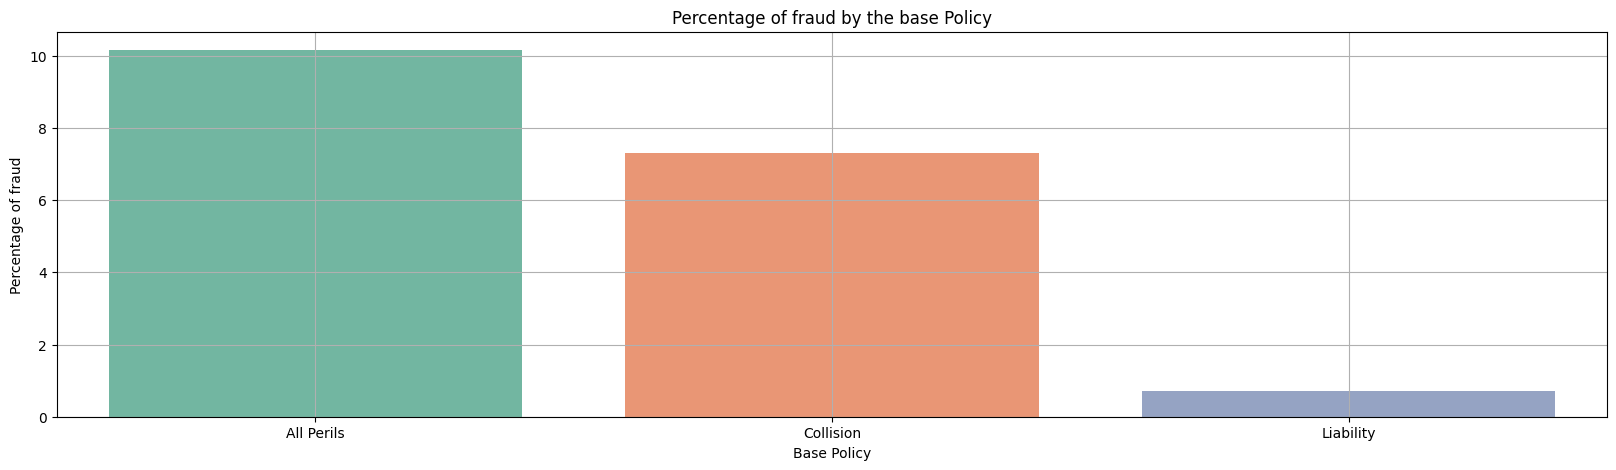

In [14]:
fraud_count = df[df['FraudFound_P'] == 1]['BasePolicy'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['BasePolicy'].value_counts()

# Get all possible policies and align the indexes
all_policies = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the policies are covered
fraud_count = fraud_count.reindex(all_policies)
non_fraud_count = non_fraud_count.reindex(all_policies)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_policy = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='BasePolicy', y='count', hue= 'BasePolicy', data=percentage_of_fraud_by_policy, palette='Set2', legend=False)
plt.xlabel('Base Policy')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by the base Policy')
plt.grid()
plt.show()

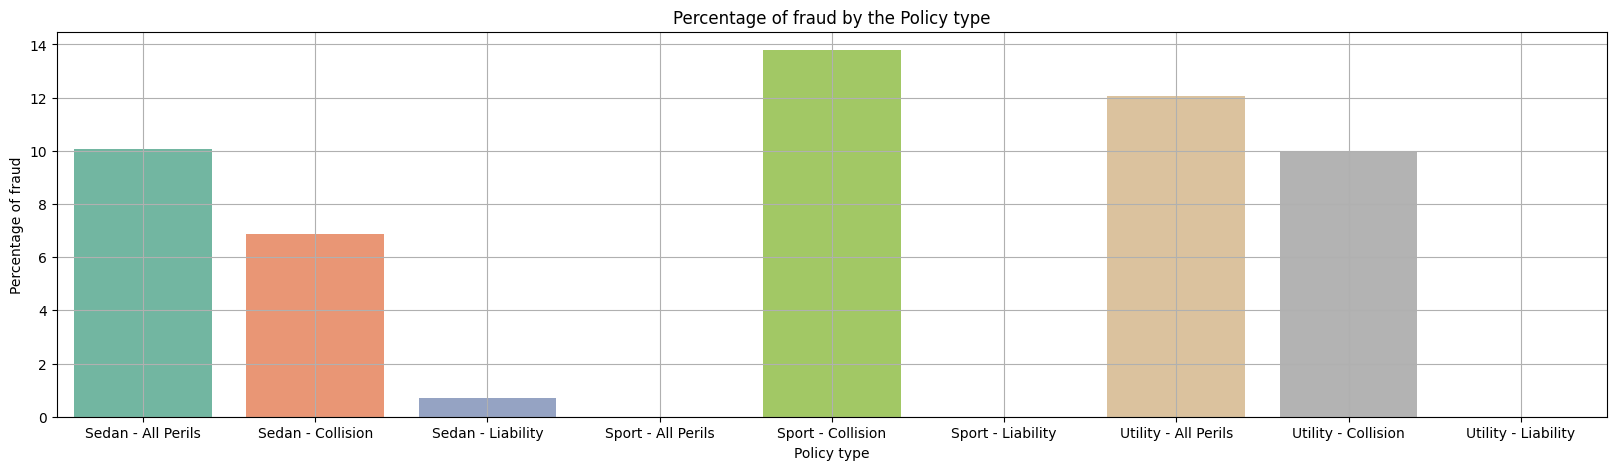

In [15]:
fraud_count = df[df['FraudFound_P'] == 1]['PolicyType'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['PolicyType'].value_counts()

# Get all possible policies and align the indexes
all_policies = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the policies are covered
fraud_count = fraud_count.reindex(all_policies)
non_fraud_count = non_fraud_count.reindex(all_policies)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_policy_type = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='PolicyType', y='count', hue= 'PolicyType', data=percentage_of_fraud_by_policy_type, palette='Set2', legend=False)
plt.xlabel('Policy type')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by the Policy type')
plt.grid()
plt.show()

- Liability: covers the costs of the damage to others if the policy holder is guilty
- Collision: covers the costs of the repairing for the policy holder's car after collision regardless of who is at fault
- All perils: or Comprehensive coverage, it covers any causes of the damage other than collision (natural disaster/fire/theft ..)
--------------------------------------------------------------------------------------------------------------------
- The collision and all perils policies have the most frequent fraud cases detected, which is logical based on the privileges of these policies



## Distribution of fraud by the vehicle price

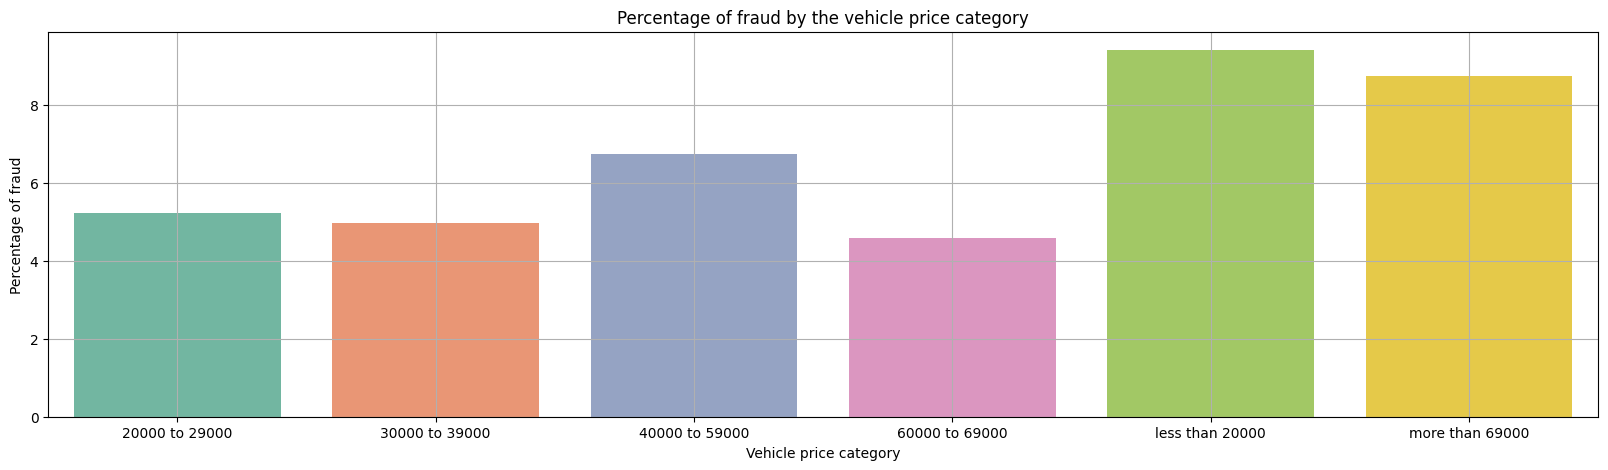

In [16]:
fraud_count = df[df['FraudFound_P'] == 1]['VehiclePrice'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['VehiclePrice'].value_counts()

# Get all possible vehicle prices and align the indexes
all_prices = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the prices categories are covered
fraud_count = fraud_count.reindex(all_prices)
non_fraud_count = non_fraud_count.reindex(all_prices)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_vehicle_price = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='VehiclePrice', y='count', hue= 'VehiclePrice', data=percentage_of_fraud_by_vehicle_price, palette='Set2', legend=False)
plt.xlabel('Vehicle price category')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by the vehicle price category')
plt.grid()
plt.show()

- The fraud is mostly detected in cheap and expensive cars

## Distribution of fraud by the vehicle brand

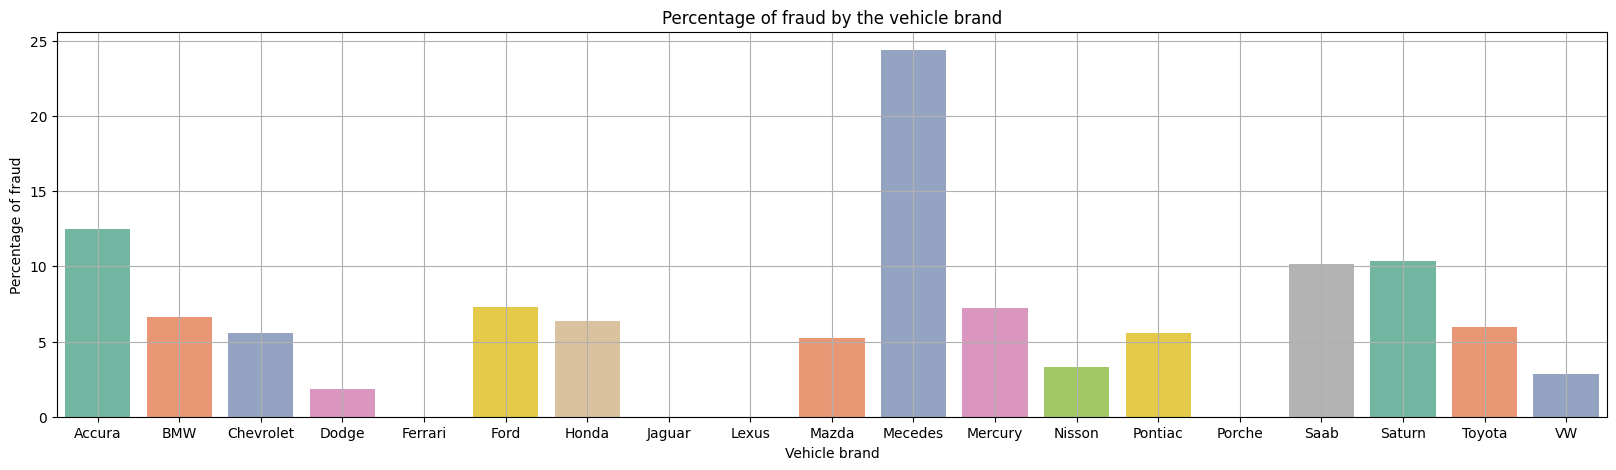

In [17]:
fraud_count = df[df['FraudFound_P'] == 1]['Make'].value_counts()
non_fraud_count = df[df['FraudFound_P'] == 0]['Make'].value_counts()

# Get all the vehicle brands align the indexes
all_brands = sorted(set(fraud_count.index).union(set(non_fraud_count.index)))

# Reindex the counts to ensure all the vehicle brands are covered
fraud_count = fraud_count.reindex(all_brands)
non_fraud_count = non_fraud_count.reindex(all_brands)

# Step 3: Calculate the percentage of fraud for each month
percentage_of_fraud_by_brand = pd.DataFrame((fraud_count / (fraud_count + non_fraud_count + 0.1)) * 100)

plt.figure(figsize=(20, 5))
sns.barplot(x='Make', y='count', hue= 'Make', data=percentage_of_fraud_by_brand, palette='Set2', legend=False)
plt.xlabel('Vehicle brand')
plt.ylabel('Percentage of fraud')
plt.title('Percentage of fraud by the vehicle brand')
plt.grid()
plt.show()

- Mercedes cars owners seems to commit fraud more than the other brand's owners

In [19]:
df[df['FraudFound_P'] == 1].Make.value_counts()

Make
Pontiac      213
Toyota       186
Honda        179
Mazda        123
Chevrolet     94
Accura        59
Ford          33
Saab          11
VW             8
Mercury        6
Saturn         6
Dodge          2
Nisson         1
Mecedes        1
BMW            1
Name: count, dtype: int64

In [20]:
df[df['FraudFound_P'] == 0].Make.value_counts()

Make
Pontiac      3624
Toyota       2935
Honda        2622
Mazda        2231
Chevrolet    1587
Ford          417
Accura        413
VW            275
Dodge         107
Saab           97
Mercury        77
Saturn         52
Nisson         29
BMW            14
Jaguar          6
Porche          5
Mecedes         3
Ferrari         2
Lexus           1
Name: count, dtype: int64